<a href="https://colab.research.google.com/github/moonsejin315/Python/blob/main/LLM_%EC%9D%91%EC%9A%A9_%EA%B8%88%EC%9C%B5%EC%B1%97%EB%B4%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#titoken : 텍스트 데이터의 토큰화 과정을 처리
#faiss-cpu : 벡터의 유사성 검색(cpu에서 잘 동작하는 벡터 검색)
#pypdf : pdf를 다루는 python모듈
#chorma db : 벡터 데이터베이
!pip install langchain titoken openai faiss-cpu pypdf chromadb
!pip install langchain-community

ERROR: Could not find a version that satisfies the requirement titoken (from versions: none)
ERROR: No matching distribution found for titoken
  Using cached langchain-0.2.12-py3-none-any.whl.metadata (7.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.6/990.6 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.9/379.9 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
import os

os.environ['OPENAI_API_KEY'] = '########################################'

## 라이브러리 임포트

In [ ]:
import os, re, getpass
import matplotlib.pyplot as plt

#크로마DB로 벡터스토어를 이전하기 위해 관리하는 라이브러리
from langchain.vectorstores import Chroma

#자연어 처리하며 문장, 단어를 벡터화하기 위한 라이브러리
from langchain.embeddings import OpenAIEmbeddings

#대화-응답
from langchain.chat_models import ChatOpenAI
#질의응답 시스템을 구축하되, retrieval(검색)을 통한 질의응답을 수행하는 라이브러리
from langchain.chains import RetrievalQA
#실행 중인 프로세스에서 실시간 출력을 스트리밍 하는 라이브러리
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

#pdf의 내용을 처리할 수 있게 해주는 document loaders
from langchain.document_loaders import PyPDFLoader

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. 문서 가져오기

In [ ]:
!pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 4.9 MB/s eta 0:00:00


In [ ]:
loader = PyPDFLoader('/content/2020_경제금융용어 700선_게시 .pdf')

#pypdfloader로 pdf문서를 가져오며 text를 분리함
text = loader.load_and_split()

In [ ]:
#pdf파일이 몇 개로 쪼개졌는가?
print(len(text))

366


In [ ]:
print(text[83])

page_content='71ㄱ 
바로 기준환율이며 원/엔, 원/유로, 원/파운드 등 여타 각국의 통화의 환율은 원/ 달러 
환율을 기초로 하여 자동적으로 산출(재정환율)된다. 또한 기준환율이라 하면 외국환은
행이 고객과 원화를 대가로 미달러화를 매매할 때 기준이 되는 환율(매매기준율) 을 
의미하기도 하는데, 매매기준율은 외국환중개회사를 통해 전 영업일 거래된 은행 간 
원/달러 현물거래 중 익일물(value spot)의 거래환율을 거래량으로 가중평균하여 결정되
며, 현재 서울외국환중개회사가 원/달러 및 원/위안 기준환율과 41개 재정환율을 매일 
아침 고시하고 있다. 한편, 각 은행, 환전상 등이 고객에게 자국통화와 외국통화를 매입 /
매도하는 거래에서 적용하는 대고객환율은 기준환율에다 외환 환전업무에 소요되는 
리스크, 업무처리비용, 수익 등을 종합적으로 반영하여 자체적으로 정하게 되므로 기관마
다 조금씩 다르게 된다 . 
 연관검색어 : 재정환율
기초가격
기초가격(basic price)은 일정기간 동안 경제주체가 생산한 생산물을 가격으로 평가함
에 있어 생산자가격에서 부가가치세와 같은 생산물세(prodution tax)를 제외하고 정부에
서 주는 보조금(subsidy)을 더한 가격을 의미하며, 순수하게 생산자(주로 기업)가 갖게 
되는 몫을 말한다. 일반적으로 생산물을 최종 소비하는 소비자가 지불하는 가격 즉 , 
구매자가격에는 생산물세와 보조금, 운수비용, 거래마진 등이 모두 포함되어 있으며 
생산자가격은 기초가격에다 생산물세를 더하고 보조금을 차감한 가격을 의미한다. 예를 
들어 정부가 국민 건강증진과 함께 축산농가를 지원하기 위해 우유 1병에 50원의 보조금
을 주고 100원의 생산물세와 200원의 거래마진을 붙여 상점에서 1,000원에 판매되고 
있다고 가정하자. 이 경우 구매자가격은 소비자가 지불하는 가격 1,000원이며, 생산자가
격은 구매자가격 1,000원에서 유통업자의 몫인 거래마진 200원을 뺀 800원이고, 기초가
격은 생산자가격 80

In [ ]:
#내용만을 추출해서 저장하기 위한 코드
documents = [t.page_content for t in text]

print(len(documents))
print(documents[83])

366
71ㄱ 
바로 기준환율이며 원/엔, 원/유로, 원/파운드 등 여타 각국의 통화의 환율은 원/ 달러 
환율을 기초로 하여 자동적으로 산출(재정환율)된다. 또한 기준환율이라 하면 외국환은
행이 고객과 원화를 대가로 미달러화를 매매할 때 기준이 되는 환율(매매기준율) 을 
의미하기도 하는데, 매매기준율은 외국환중개회사를 통해 전 영업일 거래된 은행 간 
원/달러 현물거래 중 익일물(value spot)의 거래환율을 거래량으로 가중평균하여 결정되
며, 현재 서울외국환중개회사가 원/달러 및 원/위안 기준환율과 41개 재정환율을 매일 
아침 고시하고 있다. 한편, 각 은행, 환전상 등이 고객에게 자국통화와 외국통화를 매입 /
매도하는 거래에서 적용하는 대고객환율은 기준환율에다 외환 환전업무에 소요되는 
리스크, 업무처리비용, 수익 등을 종합적으로 반영하여 자체적으로 정하게 되므로 기관마
다 조금씩 다르게 된다 . 
 연관검색어 : 재정환율
기초가격
기초가격(basic price)은 일정기간 동안 경제주체가 생산한 생산물을 가격으로 평가함
에 있어 생산자가격에서 부가가치세와 같은 생산물세(prodution tax)를 제외하고 정부에
서 주는 보조금(subsidy)을 더한 가격을 의미하며, 순수하게 생산자(주로 기업)가 갖게 
되는 몫을 말한다. 일반적으로 생산물을 최종 소비하는 소비자가 지불하는 가격 즉 , 
구매자가격에는 생산물세와 보조금, 운수비용, 거래마진 등이 모두 포함되어 있으며 
생산자가격은 기초가격에다 생산물세를 더하고 보조금을 차감한 가격을 의미한다. 예를 
들어 정부가 국민 건강증진과 함께 축산농가를 지원하기 위해 우유 1병에 50원의 보조금
을 주고 100원의 생산물세와 200원의 거래마진을 붙여 상점에서 1,000원에 판매되고 
있다고 가정하자. 이 경우 구매자가격은 소비자가 지불하는 가격 1,000원이며, 생산자가
격은 구매자가격 1,000원에서 유통업자의 몫인 거래마진 200원을 뺀 800원이고, 기초가
격은 생산자가격 800원에서 정부에 납

# 1.5 데이터 탐색하기

문서의 최대 길이 :  3877
문서의 최소 길이 :  370
문서의 평균 길이 :  1169.191256830601


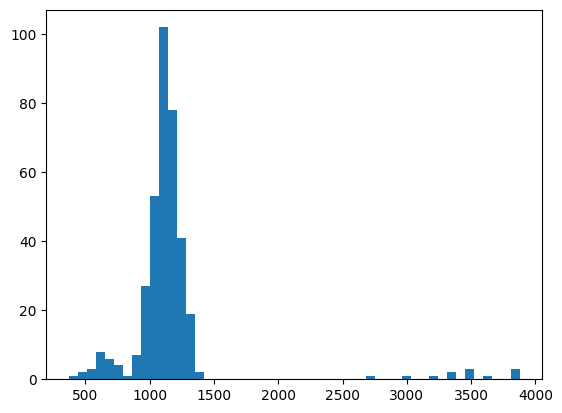

In [ ]:
print("문서의 최대 길이 : ", max(len(document) for document in documents))
print("문서의 최소 길이 : ", min(len(document) for document in documents))
print("문서의 평균 길이 : ", sum(map(len, documents))  / len(documents))

#documents의 길이를 -> 50개의 구간으로 나눠 -> 히스토그램 그림
plt.hist([len(review) for review in documents], bins=50)
plt.show()

In [ ]:
text[12].page_content

'xiii찾아보기 ❙\n환매조건부매매/RP/Repo ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ 331\n환 어 음 ・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・ 332\n환율조작국 ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ 332\n환전영업자(환전상) ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ 333\n환차손/환차익 ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ 333\n황금낙하산 ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ 334\n회 사 채 ・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・ 334\n회수의문 ・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・ 335\n후방연쇄효과 ・ ・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・ 335\n후순위금융채 ・ ・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・ 335\n후행종합지수 ・ ・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・ 336\nABC\nB e y o n d  G D P ・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・ 337\nBIS 자기자본비율 ・ ・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・ 338\nCAMEL-R시스템/ROCA시스템 /\nC A C R E L 시 스 템 ・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・ 338\nC L S 은 행 ・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・

In [ ]:
text[13].page_content

"1ㄱ \nㄱ\n가계부실위험지수(HDRI)\n가구의 소득 흐름은 물론 금융 및 실물 자산까지 종합적으로 고려하여 가계부채의 \n부실위험을 평가하는 지표로, 가계의 채무상환능력을 소득 측면에서 평가하는 원리금상\n환비율(DSR; Debt Service Ratio)과 자산 측면에서 평가하는 부채/자산비율(DTA; Debt \nTo Asset Ratio)을 결합하여 산출한 지수이다. 가계부실위험지수는 가구의 DSR과 DTA 가 \n각각 40%, 100%일 때 100의 값을 갖도록 설정되어 있으며, 동 지수가 100을 초과하는 \n가구를 ‘위험가구’로 분류한다. 위험가구는 소득 및 자산 측면에서 모두 취약한 ‘고위험가구’,  \n자산 측면에서 취약한 ‘고DTA가구’, 소득 측면에서 취약한 ‘고DSR가구’로 구분할 수 있다 . \n다만 위험 및 고위험 가구는 가구의 채무상환능력 취약성 정도를 평가하기 위한 것이며 \n이들 가구가 당장 채무상환 불이행, 즉 임계상황에 직면한 것을 의미하지 않는다 .\n 연관검색어 : 총부채원리금상환비율(DSR)\n가계수지\n가정에서 일정 기간의 수입(명목소득)과 지출을 비교해서 남았는지 모자랐는지를 \n표시한 것을 가계수지(household's total income and expenditure)라 한다. 가계수지 가 가계수지 ∙"

In [ ]:
documents[12]

'xiii찾아보기 ❙\n환매조건부매매/RP/Repo ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ 331\n환 어 음 ・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・ 332\n환율조작국 ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ 332\n환전영업자(환전상) ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ 333\n환차손/환차익 ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ 333\n황금낙하산 ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ ・ 334\n회 사 채 ・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・ 334\n회수의문 ・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・ 335\n후방연쇄효과 ・ ・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・ 335\n후순위금융채 ・ ・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・ 335\n후행종합지수 ・ ・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・ 336\nABC\nB e y o n d  G D P ・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・ 337\nBIS 자기자본비율 ・ ・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・ 338\nCAMEL-R시스템/ROCA시스템 /\nC A C R E L 시 스 템 ・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・ 338\nC L S 은 행 ・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・

In [ ]:
documents[13]

"1ㄱ \nㄱ\n가계부실위험지수(HDRI)\n가구의 소득 흐름은 물론 금융 및 실물 자산까지 종합적으로 고려하여 가계부채의 \n부실위험을 평가하는 지표로, 가계의 채무상환능력을 소득 측면에서 평가하는 원리금상\n환비율(DSR; Debt Service Ratio)과 자산 측면에서 평가하는 부채/자산비율(DTA; Debt \nTo Asset Ratio)을 결합하여 산출한 지수이다. 가계부실위험지수는 가구의 DSR과 DTA 가 \n각각 40%, 100%일 때 100의 값을 갖도록 설정되어 있으며, 동 지수가 100을 초과하는 \n가구를 ‘위험가구’로 분류한다. 위험가구는 소득 및 자산 측면에서 모두 취약한 ‘고위험가구’,  \n자산 측면에서 취약한 ‘고DTA가구’, 소득 측면에서 취약한 ‘고DSR가구’로 구분할 수 있다 . \n다만 위험 및 고위험 가구는 가구의 채무상환능력 취약성 정도를 평가하기 위한 것이며 \n이들 가구가 당장 채무상환 불이행, 즉 임계상황에 직면한 것을 의미하지 않는다 .\n 연관검색어 : 총부채원리금상환비율(DSR)\n가계수지\n가정에서 일정 기간의 수입(명목소득)과 지출을 비교해서 남았는지 모자랐는지를 \n표시한 것을 가계수지(household's total income and expenditure)라 한다. 가계수지 가 가계수지 ∙"

In [ ]:
#12페이지 까지는 목차이므로 13페이지부터 실제로 사용
documents = documents[13:]

#맨 마지막페이지는 pdf자체에 대한 정보(데이터 아님)이므로 삭제
documents = documents[:-1]

In [ ]:
text = text[13:-1]

## 2. 임베딩

In [ ]:
embedding = OpenAIEmbeddings()
vectordb = Chroma.from_documents(
    documents=text,
    embedding=embedding
)

In [ ]:
## vectordb가 갖고있는 요소 살펴보기
for k in vectordb._collection.get():
  print(k)

ids
embeddings
metadatas
documents
uris
data
included


In [ ]:
vectordb._collection.get(['documents'])

{'ids': [],
 'embeddings': None,
 'metadatas': [],
 'documents': [],
 'uris': None,
 'data': None,
 'included': ['metadatas', 'documents']}

In [ ]:
em = vectordb._collection.get(include=['embeddings'])['embeddings']

In [ ]:
print(em[0])

[-6.981877231737599e-05, -0.014997703023254871, 0.04050455242395401, -0.03214561194181442, -0.008641148917376995, 0.011261716485023499, -0.015992173925042152, -0.00467670289799571, -0.031984347850084305, -0.04117649048566818, 0.011967253871262074, 0.03641915321350098, 0.0022577187046408653, -0.0014891872415319085, -0.018518667668104172, 0.031124265864491463, 0.020413540303707123, -0.02585625648498535, 0.002479459159076214, -0.0068537890911102295, -0.008291739970445633, -0.008802414871752262, -0.02264438197016716, -0.011631283909082413, -0.006887386087328196, 0.0026071276515722275, 0.03910691291093826, -0.02030603028833866, -0.009124945849180222, 0.005983626935631037, 0.004152589477598667, -0.01164472196251154, -0.012585438787937164, 0.012713107280433178, 0.011302032507956028, 0.004985795821994543, 0.0010515862377360463, 0.0025483330246061087, 0.021313941106200218, -0.022160585969686508, 0.0065816533751785755, 0.006161690689623356, -0.004169388208538294, -0.0064170281402766705, -0.01220

### 유사도 높은 문서 추출 -> 답변

In [ ]:
#유사도가 가장 높은 2개의 문서를 추출하는 검색기
result = vectordb.as_retriever(search_kwargs={"k":2})

In [ ]:
docs = result.get_relevant_documents("비트코인이 뭐야?")
print(len(docs))
print("----------")
print(docs[0])

print("----------")
print(docs[1])

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


2
----------
page_content='139ㅂ 
비트코인
비트코인(bitcoin)은 가상통화(암호통화)이자 디지털 지급시스템이다. 비트코인 시스템
은 중앙 저장소 또는 단일 관리자가 없기 때문에 최초의 탈중앙화된 디지털통화라고 불린다 . 
이는 사토시 나카모토라는 사람(집단)에 의해 만들어져서 2009년 개방형 소프트웨어로 
배포되었다. 이 시스템은 공유형(peer-to-peer)이며, 거래는 중개자 없이 블록체인 소프트
웨어를 이용하는 참여자(nodes) 사이에 직접 이뤄진다. 이런 거래들은 공유(P2P) 네트워크
상 참여자의 작업증명(proof-of-work)을 통해 검증되고 공개된 분산원장인 블록체인에 
기록된다. 승인된 거래의 새 그룹인 한 블록은 대략 10분에 한 번씩 만들어져서 블록체인에 
추가되고 신속하게 모든 참여자에게 보내어진다. 비트코인은 대규모 전기를 사용하는 
컴퓨터 처리 능력(power)을 활용해서 이뤄지는 기록보관 서비스인 채굴(mining)에 대한 
보상으로 발행되고 있으며 다른 통화 ･상품･용역 등과 교환되어가고 있다. 중앙은행이 
발행한 법정화폐가 아닌 비트코인은 비트코인 플랫폼에서 거래되며 투자대상으로서도 
관심을 받고 있다. 하지만 급등한 가격 및 심한 변동 폭으로 거품논란이 크다. 또한 익명성으
로 자금세탁 등 불법거래에 악용될 소지가 많아 중국 등 일부 국가에서 비트코인 등 가상통
화의 거래를 규제하고 있다. 일본의 경우 비트코인의 거래이익에 대해 세금을 부과한다 . 
비트코인은 추가되는 한 블록당 새로 12.5비트코인을 보상하는데(2016.7월 현재), 21 만개
가 채굴될 때(대략 4년)마다 그 보상이 반으로 줄어든다. 비트코인의 총량은 21 백만개이며 
2140년경 모두 채굴될 것으로 전망된다. 비트코인은 그 시스템의 설계시 그 수량을 한정시
켜 놓았기 때문에 원칙적으로 인플레이션에 의해 가치가 떨어질 수 있는 화폐와 다른 
속성을 지닌다. 한편 2017년 8월 1일 비트코인(classic bitcoin)에

## QA체인

In [ ]:
llm = ChatOpenAI(model_name="gpt-4o",
                 streaming=True,
                 temperature=0,
                 callbacks=[StreamingStdOutCallbackHandler()])

qa_chain = RetrievalQA.from_chain_type(
    llm = llm,
    chain_type='stuff',
    retriever = result,
    return_source_documents=True
)

In [ ]:
response = qa_chain("주택청약이 뭐야?")

주택청약은 주택을 분양받기 위해 신청하는 절차를 말합니다. 주택청약을 통해 신청자는 특정 주택의 분양을 받을 수 있는 기회를 얻습니다. 주택청약은 주로 공공주택이나 민간주택의 분양 시에 이루어지며, 신청자는 일정한 자격 요건을 충족해야 합니다. 예를 들어, 무주택자이거나 일정 소득 이하의 가구 등이 주택청약에 우선권을 가질 수 있습니다.

주택청약은 보통 청약통장을 통해 이루어지며, 청약통장에 일정 금액을 예치하고 일정 기간 동안 유지하면 청약 가점이 쌓이게 됩니다. 이 가점은 주택청약 시 당첨 확률을 높이는 데 중요한 역할을 합니다. 주택청약은 주택을 구입하려는 사람들에게 중요한 절차로, 주택 시장에서의 수요와 공급을 조절하는 데에도 중요한 역할을 합니다.

In [ ]:
response = qa_chain("금리가 오르는 이유는 뭐야?")

금리가 오르는 이유는 여러 가지가 있습니다. 주요 요인들은 다음과 같습니다:

1. **통화정책**: 중앙은행이 인플레이션을 억제하거나 경제를 과열되지 않게 하기 위해 정책금리를 인상할 때 금리가 오릅니다. 예를 들어, 한국은행이 정책금리를 인상하면 시장 금리도 따라서 오르게 됩니다.

2. **인플레이션 기대**: 시장 참여자들이 향후 인플레이션이 상승할 것으로 예상하면, 금리가 오를 수 있습니다. 이는 인플레이션이 화폐의 가치를 떨어뜨리기 때문에, 대출자들이 더 높은 금리를 요구하게 되기 때문입니다.

3. **경제 성장**: 경제가 성장하고 기업의 투자 수요가 증가하면, 자금 수요가 늘어나면서 금리가 오를 수 있습니다. 이는 자금의 수요와 공급 법칙에 따라 자금 수요가 많아지면 금리가 상승하는 결과를 초래합니다.

4. **정부의 재정 정책**: 정부가 재정 적자를 메우기 위해 국채를 많이 발행하면, 국채 공급이 증가하면서 금리가 오를 수 있습니다. 이는 국채의 공급이 많아지면 그만큼 금리를 높여야 투자자들이 국채를 매입하기 때문입니다.

5. **국제 요인**: 글로벌 경제 상황이나 다른 국가의 금리 변화도 국내 금리에 영향을 미칠 수 있습니다. 예를 들어, 미국 연방준비제도(Fed)가 금리를 인상하면, 다른 나라들도 자본 유출을 막기 위해 금리를 인상할 수 있습니다.

이와 같은 요인들이 복합적으로 작용하여 금리가 오르게 됩니다.

In [ ]:
!pip install gradio==3.50.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 12.0
    Uninstalling websockets-12.0:
      Successfully uninstalled websockets-12.0


In [ ]:
import gradio as gr

with gr.Blocks() as demo:
    chatbot = gr.Chatbot(label = "경제 금융 용어 알려드립니다.")
    message = gr.Textbox(label = "여기에 질문하세요!")
    clear = gr.Button("대화 초기화")

    #이 그리다오 페이지가 실행되었을때 qa_chain에다 메세지를 전달
    #chatbot과 나눈 대화를 chat_history에 기억
    def respond(mes, chat_history):
      result = qa_chain(mes)
      bot_message = result['result']

      chat_history.append((mes, bot_message))

      return " ", chat_history
    #텍스트를 입력했을 때 수행할 내용
    message.submit(respond, [message,chatbot], [message, chatbot])

    #대화 초기화
    #lambda:None -> 클릭했을 때 어떤 행동을 할 것인가?
    #None -> Chatbot : 입력도 None -> chatbot에 전달
    #None, queue = False -> 이 gradio가 가지고 있는 기존의 메모리를 삭제
    clear.click(lambda: None, None, chatbot, queue=False)

demo.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
IMPORTANT: You are using gradio version 3.50.2, however version 4.29.0 is available, please upgrade.
--------
Running on public URL: https://726a011638917bc49f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


비트코인(bitcoin)은 가상통화(암호통화)이자 디지털 지급 시스템입니다. 비트코인 시스템은 중앙 저장소나 단일 관리자가 없기 때문에 최초의 탈중앙화된 디지털 통화로 불립니다. 이는 사토시 나카모토라는 사람(또는 집단)에 의해 만들어져 2009년 개방형 소프트웨어로 배포되었습니다.

비트코인 시스템은 공유형(peer-to-peer) 네트워크를 기반으로 하며, 거래는 중개자 없이 블록체인 소프트웨어를 이용하는 참여자(nodes) 사이에 직접 이루어집니다. 거래는 참여자의 작업증명(proof-of-work)을 통해 검증되고, 공개된 분산원장인 블록체인에 기록됩니다. 승인된 거래의 새 그룹인 한 블록은 대략 10분에 한 번씩 만들어져 블록체인에 추가되고, 신속하게 모든 참여자에게 전송됩니다.

비트코인은 대규모 전기를 사용하는 컴퓨터 처리 능력을 활용한 채굴(mining)에 대한 보상으로 발행되며, 다른 통화, 상품, 용역 등과 교환될 수 있습니다. 비트코인은 중앙은행이 발행한 법정화폐가 아니며, 비트코인 플랫폼에서 거래되고 투자 대상으로도 관심을 받고 있습니다. 하지만 급등한 가격과 심한 변동성으로 인해 거품 논란이 있으며, 익명성으로 인해 자금세탁 등 불법 거래에 악용될 소지가 있어 일부 국가에서는 비트코인 거래를 규제하고 있습니다.

비트코인은 추가되는 한 블록당 새로 12.5 비트코인을 보상하는데, 21만 개가 채굴될 때마다 그 보상이 반으로 줄어듭니다. 비트코인의 총량은 21백만 개로 한정되어 있으며, 2140년경 모두 채굴될 것으로 전망됩니다. 비트코인은 그 수량이 한정되어 있어 인플레이션에 의해 가치가 떨어질 수 있는 화폐와는 다른 속성을 지닙니다.

2017년 8월 1일에는 비트코인에서 '비트코인캐시'(BCH)가, 10월 25일에는 '비트코인골드'(BTG)가 하드포크(hard-fork)되어 별도로 거래되고 있습니다.비트코인(bitcoin)은 가상통화(암호통화)이자 디지털 지급 시스템입니다. 비트코인 시스템은 중앙 저장소나 단일 관리자가 없기 때문에 